In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import models
from keras import optimizers
from keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sonar.csv", header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
shuffled_data = data.sample(frac = 1)
shuffled_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
184,0.0269,0.0383,0.0505,0.0707,0.1313,0.2103,0.2263,0.2524,0.3595,0.5915,...,0.0167,0.0199,0.0145,0.0081,0.0045,0.0043,0.0027,0.0055,0.0057,M
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
170,0.0134,0.0172,0.0178,0.0363,0.0444,0.0744,0.0800,0.0456,0.0368,0.1250,...,0.0094,0.0048,0.0047,0.0016,0.0008,0.0042,0.0024,0.0027,0.0041,M
158,0.0107,0.0453,0.0289,0.0713,0.1075,0.1019,0.1606,0.2119,0.3061,0.2936,...,0.0164,0.0120,0.0113,0.0021,0.0097,0.0072,0.0060,0.0017,0.0036,M
172,0.0180,0.0444,0.0476,0.0698,0.1615,0.0887,0.0596,0.1071,0.3175,0.2918,...,0.0122,0.0114,0.0098,0.0027,0.0025,0.0026,0.0050,0.0073,0.0022,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
59,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
121,0.0162,0.0041,0.0239,0.0441,0.0630,0.0921,0.1368,0.1078,0.1552,0.1779,...,0.0173,0.0135,0.0114,0.0062,0.0157,0.0088,0.0036,0.0053,0.0030,M
32,0.0195,0.0213,0.0058,0.0190,0.0319,0.0571,0.1004,0.0668,0.0691,0.0242,...,0.0157,0.0074,0.0271,0.0203,0.0089,0.0095,0.0095,0.0021,0.0053,R


In [4]:
data_set = shuffled_data.values
data_set

array([[0.0269, 0.0383, 0.0505, ..., 0.0055, 0.0057, 'M'],
       [0.0286, 0.0453, 0.0277, ..., 0.0051, 0.0062, 'R'],
       [0.0134, 0.0172, 0.0178, ..., 0.0027, 0.0041, 'M'],
       ...,
       [0.0162, 0.0041, 0.0239, ..., 0.0053, 0.003, 'M'],
       [0.0195, 0.0213, 0.0058, ..., 0.0021, 0.0053, 'R'],
       [0.0274, 0.0242, 0.0621, ..., 0.022, 0.0173, 'R']], dtype=object)

In [5]:
x_train = data_set[:144,:60].astype("float32")
y_train = data_set[:144,60]

x_test = data_set[144:185,:60].astype("float32")
y_test = data_set[144:185,60]

x_val = data_set[185:,:60].astype("float32")
y_val = data_set[185:,60]

In [6]:
le = LabelEncoder()
encoded_y_train = le.fit_transform(y_train)
encoded_y_test = le.fit_transform(y_test)
encoded_y_val = le.fit_transform(y_val)

In [68]:
def neural_model():
    model = models.Sequential()
    model.add(layers.Dense(60, activation = "relu"))
    model.add(layers.Dense(30, activation = "relu"))
    model.add(layers.Dense(10, activation = "relu"))
    model.add(layers.Dense(1, activation = "sigmoid"))
    model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
                  loss =losses.binary_crossentropy,
                  metrics = [metrics.binary_accuracy])
    return model

In [69]:
model = neural_model()

In [70]:
model.fit(x_train, encoded_y_train, epochs = 200)

Epoch 1/200
144/144 [==============================] - 0s 748us/step - loss: 0.6902 - binary_accuracy: 0.5139
Epoch 2/200
144/144 [==============================] - 0s 125us/step - loss: 0.6717 - binary_accuracy: 0.6042
Epoch 3/200
144/144 [==============================] - 0s 152us/step - loss: 0.6575 - binary_accuracy: 0.6944
Epoch 4/200
144/144 [==============================] - 0s 145us/step - loss: 0.6481 - binary_accuracy: 0.7014
Epoch 5/200
144/144 [==============================] - 0s 118us/step - loss: 0.6354 - binary_accuracy: 0.6875
Epoch 6/200
144/144 [==============================] - 0s 118us/step - loss: 0.6278 - binary_accuracy: 0.7014
Epoch 7/200
144/144 [==============================] - 0s 111us/step - loss: 0.6118 - binary_accuracy: 0.7500
Epoch 8/200
144/144 [==============================] - 0s 139us/step - loss: 0.5946 - binary_accuracy: 0.7639
Epoch 9/200
144/144 [==============================] - 0s 152us/step - loss: 0.5794 - binary_accuracy: 0.7569
Epoch 10/2

144/144 [==============================] - 0s 111us/step - loss: 0.1893 - binary_accuracy: 0.9236
Epoch 75/200
144/144 [==============================] - 0s 90us/step - loss: 0.1501 - binary_accuracy: 0.9583
Epoch 76/200
144/144 [==============================] - 0s 111us/step - loss: 0.1398 - binary_accuracy: 0.9653
Epoch 77/200
144/144 [==============================] - 0s 132us/step - loss: 0.1625 - binary_accuracy: 0.9375
Epoch 78/200
144/144 [==============================] - 0s 139us/step - loss: 0.1588 - binary_accuracy: 0.9514
Epoch 79/200
144/144 [==============================] - 0s 139us/step - loss: 0.1325 - binary_accuracy: 0.9583
Epoch 80/200
144/144 [==============================] - 0s 118us/step - loss: 0.1384 - binary_accuracy: 0.9583
Epoch 81/200
144/144 [==============================] - 0s 118us/step - loss: 0.1618 - binary_accuracy: 0.9306
Epoch 82/200
144/144 [==============================] - 0s 118us/step - loss: 0.1368 - binary_accuracy: 0.9514
Epoch 83/200
14

144/144 [==============================] - 0s 90us/step - loss: 0.0305 - binary_accuracy: 1.0000
Epoch 148/200
144/144 [==============================] - 0s 111us/step - loss: 0.0257 - binary_accuracy: 1.0000
Epoch 149/200
144/144 [==============================] - 0s 97us/step - loss: 0.0233 - binary_accuracy: 0.9931
Epoch 150/200
144/144 [==============================] - 0s 111us/step - loss: 0.0297 - binary_accuracy: 0.9931
Epoch 151/200
144/144 [==============================] - 0s 125us/step - loss: 0.0325 - binary_accuracy: 1.0000
Epoch 152/200
144/144 [==============================] - 0s 132us/step - loss: 0.0254 - binary_accuracy: 1.0000
Epoch 153/200
144/144 [==============================] - 0s 125us/step - loss: 0.0173 - binary_accuracy: 1.0000
Epoch 154/200
144/144 [==============================] - 0s 152us/step - loss: 0.0145 - binary_accuracy: 1.0000
Epoch 155/200
144/144 [==============================] - ETA: 0s - loss: 0.0117 - binary_accuracy: 1.000 - 0s 125us/step

In [71]:
results = model.evaluate(x_test, encoded_y_test, verbose = 2)

In [72]:
results

[0.9707244852694069, 0.8292682766914368]

In [73]:
model_2 = neural_model()

history = model_2.fit(x_train, encoded_y_train,validation_data = (x_val, encoded_y_val), epochs = 200)

Train on 144 samples, validate on 23 samples
Epoch 1/200
144/144 [==============================] - 0s 880us/step - loss: 0.6756 - binary_accuracy: 0.5694 - val_loss: 0.6069 - val_binary_accuracy: 0.6957
Epoch 2/200
144/144 [==============================] - 0s 152us/step - loss: 0.6478 - binary_accuracy: 0.6319 - val_loss: 0.6337 - val_binary_accuracy: 0.6957
Epoch 3/200
144/144 [==============================] - 0s 159us/step - loss: 0.6201 - binary_accuracy: 0.6806 - val_loss: 0.5829 - val_binary_accuracy: 0.7391
Epoch 4/200
144/144 [==============================] - 0s 180us/step - loss: 0.5964 - binary_accuracy: 0.6806 - val_loss: 0.6237 - val_binary_accuracy: 0.6957
Epoch 5/200
144/144 [==============================] - 0s 173us/step - loss: 0.5897 - binary_accuracy: 0.7431 - val_loss: 0.5777 - val_binary_accuracy: 0.8261
Epoch 6/200
144/144 [==============================] - 0s 125us/step - loss: 0.5646 - binary_accuracy: 0.7431 - val_loss: 0.5695 - val_binary_accuracy: 0.7826
E

Epoch 52/200
144/144 [==============================] - 0s 152us/step - loss: 0.2617 - binary_accuracy: 0.8750 - val_loss: 0.3213 - val_binary_accuracy: 0.8696
Epoch 53/200
144/144 [==============================] - 0s 118us/step - loss: 0.2572 - binary_accuracy: 0.9097 - val_loss: 0.3977 - val_binary_accuracy: 0.7391
Epoch 54/200
144/144 [==============================] - 0s 132us/step - loss: 0.2314 - binary_accuracy: 0.9236 - val_loss: 0.4978 - val_binary_accuracy: 0.8261
Epoch 55/200
144/144 [==============================] - 0s 139us/step - loss: 0.2643 - binary_accuracy: 0.9097 - val_loss: 0.3278 - val_binary_accuracy: 0.8261
Epoch 56/200
144/144 [==============================] - 0s 145us/step - loss: 0.2292 - binary_accuracy: 0.9167 - val_loss: 0.3139 - val_binary_accuracy: 0.8696
Epoch 57/200
144/144 [==============================] - 0s 132us/step - loss: 0.2314 - binary_accuracy: 0.9167 - val_loss: 0.3525 - val_binary_accuracy: 0.7826
Epoch 58/200
144/144 [==================

144/144 [==============================] - 0s 104us/step - loss: 0.0789 - binary_accuracy: 0.9792 - val_loss: 0.3482 - val_binary_accuracy: 0.9130
Epoch 104/200
144/144 [==============================] - 0s 97us/step - loss: 0.0810 - binary_accuracy: 1.0000 - val_loss: 0.3134 - val_binary_accuracy: 0.8696
Epoch 105/200
144/144 [==============================] - 0s 159us/step - loss: 0.0664 - binary_accuracy: 0.9861 - val_loss: 0.3627 - val_binary_accuracy: 0.8261
Epoch 106/200
144/144 [==============================] - 0s 125us/step - loss: 0.0707 - binary_accuracy: 0.9931 - val_loss: 0.3003 - val_binary_accuracy: 0.8696
Epoch 107/200
144/144 [==============================] - 0s 139us/step - loss: 0.0631 - binary_accuracy: 0.9861 - val_loss: 0.3608 - val_binary_accuracy: 0.8696
Epoch 108/200
144/144 [==============================] - 0s 187us/step - loss: 0.0999 - binary_accuracy: 0.9653 - val_loss: 0.3449 - val_binary_accuracy: 0.8261
Epoch 109/200
144/144 [==========================

Epoch 154/200
144/144 [==============================] - 0s 159us/step - loss: 0.0111 - binary_accuracy: 1.0000 - val_loss: 0.4563 - val_binary_accuracy: 0.8696
Epoch 155/200
144/144 [==============================] - 0s 139us/step - loss: 0.0104 - binary_accuracy: 1.0000 - val_loss: 0.5062 - val_binary_accuracy: 0.8696
Epoch 156/200
144/144 [==============================] - 0s 132us/step - loss: 0.0108 - binary_accuracy: 1.0000 - val_loss: 0.4784 - val_binary_accuracy: 0.8696
Epoch 157/200
144/144 [==============================] - 0s 159us/step - loss: 0.0265 - binary_accuracy: 0.9931 - val_loss: 0.5651 - val_binary_accuracy: 0.9130
Epoch 158/200
144/144 [==============================] - 0s 132us/step - loss: 0.0236 - binary_accuracy: 0.9931 - val_loss: 0.5040 - val_binary_accuracy: 0.8261
Epoch 159/200
144/144 [==============================] - 0s 132us/step - loss: 0.0092 - binary_accuracy: 1.0000 - val_loss: 0.4862 - val_binary_accuracy: 0.8261
Epoch 160/200
144/144 [===========

In [74]:
results = model_2.fit(x_test, encoded_y_test, verbose = 2)

Epoch 1/1
 - 0s - loss: 0.8973 - binary_accuracy: 0.8293


In [75]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

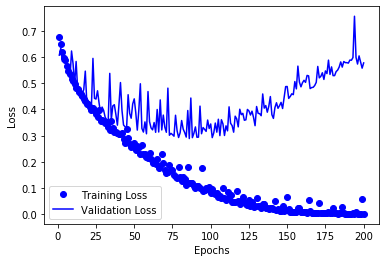

In [76]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [77]:
from sklearn.model_selection import KFold

n_split = 10

for train_index, test_index in KFold(n_split).split(x_train):
    
    
    model = neural_model()
    model.fit(x_train, encoded_y_train, epochs = 100)

Epoch 1/100
144/144 [==============================] - 0s 741us/step - loss: 0.6903 - binary_accuracy: 0.4931
Epoch 2/100
144/144 [==============================] - 0s 104us/step - loss: 0.6823 - binary_accuracy: 0.5903
Epoch 3/100
144/144 [==============================] - 0s 132us/step - loss: 0.6723 - binary_accuracy: 0.6875
Epoch 4/100
144/144 [==============================] - 0s 132us/step - loss: 0.6669 - binary_accuracy: 0.6944
Epoch 5/100
144/144 [==============================] - 0s 166us/step - loss: 0.6570 - binary_accuracy: 0.7361
Epoch 6/100
144/144 [==============================] - 0s 125us/step - loss: 0.6472 - binary_accuracy: 0.7292
Epoch 7/100
144/144 [==============================] - 0s 139us/step - loss: 0.6426 - binary_accuracy: 0.7292
Epoch 8/100
144/144 [==============================] - 0s 125us/step - loss: 0.6282 - binary_accuracy: 0.7222
Epoch 9/100
144/144 [==============================] - 0s 145us/step - loss: 0.6298 - binary_accuracy: 0.7153
Epoch 10/1

144/144 [==============================] - 0s 118us/step - loss: 0.2539 - binary_accuracy: 0.9167
Epoch 75/100
144/144 [==============================] - 0s 83us/step - loss: 0.2183 - binary_accuracy: 0.9514
Epoch 76/100
144/144 [==============================] - 0s 90us/step - loss: 0.2247 - binary_accuracy: 0.9236
Epoch 77/100
144/144 [==============================] - 0s 125us/step - loss: 0.2281 - binary_accuracy: 0.9097
Epoch 78/100
144/144 [==============================] - 0s 111us/step - loss: 0.2133 - binary_accuracy: 0.9306
Epoch 79/100
144/144 [==============================] - 0s 97us/step - loss: 0.2416 - binary_accuracy: 0.9028
Epoch 80/100
144/144 [==============================] - 0s 111us/step - loss: 0.2110 - binary_accuracy: 0.9028
Epoch 81/100
144/144 [==============================] - 0s 146us/step - loss: 0.2021 - binary_accuracy: 0.9514
Epoch 82/100
144/144 [==============================] - 0s 118us/step - loss: 0.2109 - binary_accuracy: 0.9306
Epoch 83/100
144/

144/144 [==============================] - 0s 125us/step - loss: 0.2851 - binary_accuracy: 0.8958
Epoch 48/100
144/144 [==============================] - 0s 118us/step - loss: 0.2715 - binary_accuracy: 0.9028
Epoch 49/100
144/144 [==============================] - 0s 97us/step - loss: 0.3051 - binary_accuracy: 0.8819
Epoch 50/100
144/144 [==============================] - 0s 90us/step - loss: 0.2720 - binary_accuracy: 0.9167
Epoch 51/100
144/144 [==============================] - 0s 111us/step - loss: 0.2683 - binary_accuracy: 0.9167
Epoch 52/100
144/144 [==============================] - 0s 111us/step - loss: 0.2792 - binary_accuracy: 0.8958
Epoch 53/100
144/144 [==============================] - 0s 118us/step - loss: 0.2627 - binary_accuracy: 0.8958
Epoch 54/100
144/144 [==============================] - 0s 111us/step - loss: 0.2778 - binary_accuracy: 0.8958
Epoch 55/100
144/144 [==============================] - 0s 118us/step - loss: 0.2461 - binary_accuracy: 0.9236
Epoch 56/100
144

144/144 [==============================] - 0s 90us/step - loss: 0.4627 - binary_accuracy: 0.8194
Epoch 21/100
144/144 [==============================] - 0s 104us/step - loss: 0.4360 - binary_accuracy: 0.7778
Epoch 22/100
144/144 [==============================] - 0s 97us/step - loss: 0.4367 - binary_accuracy: 0.8056
Epoch 23/100
144/144 [==============================] - 0s 111us/step - loss: 0.4311 - binary_accuracy: 0.8194
Epoch 24/100
144/144 [==============================] - 0s 111us/step - loss: 0.4134 - binary_accuracy: 0.8403
Epoch 25/100
144/144 [==============================] - 0s 118us/step - loss: 0.4169 - binary_accuracy: 0.7986
Epoch 26/100
144/144 [==============================] - 0s 118us/step - loss: 0.4320 - binary_accuracy: 0.7986
Epoch 27/100
144/144 [==============================] - 0s 118us/step - loss: 0.3958 - binary_accuracy: 0.8403
Epoch 28/100
144/144 [==============================] - 0s 118us/step - loss: 0.3931 - binary_accuracy: 0.8403
Epoch 29/100
144

Epoch 94/100
144/144 [==============================] - 0s 118us/step - loss: 0.1609 - binary_accuracy: 0.9514
Epoch 95/100
144/144 [==============================] - 0s 118us/step - loss: 0.1649 - binary_accuracy: 0.9375
Epoch 96/100
144/144 [==============================] - 0s 118us/step - loss: 0.1899 - binary_accuracy: 0.9097
Epoch 97/100
144/144 [==============================] - 0s 118us/step - loss: 0.1518 - binary_accuracy: 0.9583
Epoch 98/100
144/144 [==============================] - 0s 111us/step - loss: 0.1646 - binary_accuracy: 0.9444
Epoch 99/100
144/144 [==============================] - 0s 111us/step - loss: 0.1857 - binary_accuracy: 0.9375
Epoch 100/100
144/144 [==============================] - 0s 111us/step - loss: 0.1352 - binary_accuracy: 0.9653
Epoch 1/100
144/144 [==============================] - 0s 727us/step - loss: 0.6890 - binary_accuracy: 0.5625
Epoch 2/100
144/144 [==============================] - 0s 97us/step - loss: 0.6788 - binary_accuracy: 0.6250
Epo

Epoch 68/100
144/144 [==============================] - 0s 111us/step - loss: 0.2506 - binary_accuracy: 0.8889
Epoch 69/100
144/144 [==============================] - 0s 111us/step - loss: 0.2175 - binary_accuracy: 0.9375
Epoch 70/100
144/144 [==============================] - 0s 97us/step - loss: 0.2241 - binary_accuracy: 0.9306
Epoch 71/100
144/144 [==============================] - 0s 118us/step - loss: 0.2513 - binary_accuracy: 0.8958
Epoch 72/100
144/144 [==============================] - 0s 125us/step - loss: 0.2294 - binary_accuracy: 0.9028
Epoch 73/100
144/144 [==============================] - 0s 111us/step - loss: 0.2118 - binary_accuracy: 0.9444
Epoch 74/100
144/144 [==============================] - 0s 111us/step - loss: 0.2407 - binary_accuracy: 0.8958
Epoch 75/100
144/144 [==============================] - 0s 118us/step - loss: 0.2362 - binary_accuracy: 0.8889
Epoch 76/100
144/144 [==============================] - 0s 111us/step - loss: 0.2004 - binary_accuracy: 0.9444
Ep

Epoch 42/100
144/144 [==============================] - 0s 118us/step - loss: 0.3113 - binary_accuracy: 0.8750
Epoch 43/100
144/144 [==============================] - 0s 90us/step - loss: 0.2955 - binary_accuracy: 0.8681
Epoch 44/100
144/144 [==============================] - 0s 118us/step - loss: 0.2696 - binary_accuracy: 0.9167
Epoch 45/100
144/144 [==============================] - 0s 118us/step - loss: 0.2897 - binary_accuracy: 0.8889
Epoch 46/100
144/144 [==============================] - 0s 125us/step - loss: 0.2720 - binary_accuracy: 0.8958
Epoch 47/100
144/144 [==============================] - 0s 118us/step - loss: 0.2609 - binary_accuracy: 0.9236
Epoch 48/100
144/144 [==============================] - 0s 104us/step - loss: 0.2637 - binary_accuracy: 0.9028
Epoch 49/100
144/144 [==============================] - 0s 111us/step - loss: 0.2550 - binary_accuracy: 0.9167
Epoch 50/100
144/144 [==============================] - 0s 118us/step - loss: 0.2648 - binary_accuracy: 0.9167
Ep

Epoch 16/100
144/144 [==============================] - 0s 118us/step - loss: 0.4879 - binary_accuracy: 0.7500
Epoch 17/100
144/144 [==============================] - 0s 90us/step - loss: 0.4820 - binary_accuracy: 0.7500
Epoch 18/100
144/144 [==============================] - 0s 118us/step - loss: 0.4691 - binary_accuracy: 0.7639
Epoch 19/100
144/144 [==============================] - 0s 118us/step - loss: 0.4667 - binary_accuracy: 0.7708
Epoch 20/100
144/144 [==============================] - 0s 118us/step - loss: 0.4656 - binary_accuracy: 0.7708
Epoch 21/100
144/144 [==============================] - 0s 118us/step - loss: 0.4619 - binary_accuracy: 0.7708
Epoch 22/100
144/144 [==============================] - 0s 118us/step - loss: 0.4621 - binary_accuracy: 0.7917
Epoch 23/100
144/144 [==============================] - 0s 125us/step - loss: 0.4352 - binary_accuracy: 0.7986
Epoch 24/100
144/144 [==============================] - 0s 118us/step - loss: 0.4379 - binary_accuracy: 0.8125
Ep

144/144 [==============================] - 0s 90us/step - loss: 0.1545 - binary_accuracy: 0.9583
Epoch 90/100
144/144 [==============================] - 0s 111us/step - loss: 0.1465 - binary_accuracy: 0.9444
Epoch 91/100
144/144 [==============================] - 0s 97us/step - loss: 0.1438 - binary_accuracy: 0.9722
Epoch 92/100
144/144 [==============================] - 0s 111us/step - loss: 0.1752 - binary_accuracy: 0.9444
Epoch 93/100
144/144 [==============================] - 0s 118us/step - loss: 0.1519 - binary_accuracy: 0.9167
Epoch 94/100
144/144 [==============================] - 0s 125us/step - loss: 0.1346 - binary_accuracy: 0.9722
Epoch 95/100
144/144 [==============================] - 0s 125us/step - loss: 0.1293 - binary_accuracy: 0.9861
Epoch 96/100
144/144 [==============================] - 0s 111us/step - loss: 0.1390 - binary_accuracy: 0.9722
Epoch 97/100
144/144 [==============================] - 0s 118us/step - loss: 0.1664 - binary_accuracy: 0.9444
Epoch 98/100
144

144/144 [==============================] - 0s 111us/step - loss: 0.2505 - binary_accuracy: 0.9167
Epoch 63/100
144/144 [==============================] - 0s 118us/step - loss: 0.2566 - binary_accuracy: 0.9028
Epoch 64/100
144/144 [==============================] - 0s 125us/step - loss: 0.2428 - binary_accuracy: 0.9167
Epoch 65/100
144/144 [==============================] - 0s 118us/step - loss: 0.2586 - binary_accuracy: 0.8889
Epoch 66/100
144/144 [==============================] - 0s 118us/step - loss: 0.2396 - binary_accuracy: 0.9097
Epoch 67/100
144/144 [==============================] - 0s 111us/step - loss: 0.2472 - binary_accuracy: 0.8958
Epoch 68/100
144/144 [==============================] - 0s 118us/step - loss: 0.2534 - binary_accuracy: 0.8889
Epoch 69/100
144/144 [==============================] - 0s 118us/step - loss: 0.2278 - binary_accuracy: 0.9236
Epoch 70/100
144/144 [==============================] - 0s 132us/step - loss: 0.2565 - binary_accuracy: 0.8958
Epoch 71/100
1

144/144 [==============================] - 0s 111us/step - loss: 0.3668 - binary_accuracy: 0.8611
Epoch 37/100
144/144 [==============================] - 0s 111us/step - loss: 0.3559 - binary_accuracy: 0.8958
Epoch 38/100
144/144 [==============================] - 0s 90us/step - loss: 0.3480 - binary_accuracy: 0.8889
Epoch 39/100
144/144 [==============================] - 0s 111us/step - loss: 0.3471 - binary_accuracy: 0.8889
Epoch 40/100
144/144 [==============================] - 0s 118us/step - loss: 0.3301 - binary_accuracy: 0.9028
Epoch 41/100
144/144 [==============================] - 0s 111us/step - loss: 0.3286 - binary_accuracy: 0.8889
Epoch 42/100
144/144 [==============================] - 0s 125us/step - loss: 0.3268 - binary_accuracy: 0.8750
Epoch 43/100
144/144 [==============================] - 0s 118us/step - loss: 0.3337 - binary_accuracy: 0.8750
Epoch 44/100
144/144 [==============================] - 0s 111us/step - loss: 0.3050 - binary_accuracy: 0.9097
Epoch 45/100
14

144/144 [==============================] - 0s 97us/step - loss: 0.5661 - binary_accuracy: 0.7500
Epoch 11/100
144/144 [==============================] - 0s 111us/step - loss: 0.5518 - binary_accuracy: 0.7708
Epoch 12/100
144/144 [==============================] - 0s 111us/step - loss: 0.5375 - binary_accuracy: 0.7986
Epoch 13/100
144/144 [==============================] - 0s 90us/step - loss: 0.5285 - binary_accuracy: 0.8056
Epoch 14/100
144/144 [==============================] - 0s 118us/step - loss: 0.5103 - binary_accuracy: 0.8125
Epoch 15/100
144/144 [==============================] - 0s 118us/step - loss: 0.4953 - binary_accuracy: 0.7847
Epoch 16/100
144/144 [==============================] - 0s 111us/step - loss: 0.4893 - binary_accuracy: 0.7986
Epoch 17/100
144/144 [==============================] - 0s 118us/step - loss: 0.5010 - binary_accuracy: 0.7569
Epoch 18/100
144/144 [==============================] - 0s 111us/step - loss: 0.4745 - binary_accuracy: 0.7917
Epoch 19/100
144

144/144 [==============================] - 0s 111us/step - loss: 0.1530 - binary_accuracy: 0.9583
Epoch 85/100
144/144 [==============================] - 0s 90us/step - loss: 0.1640 - binary_accuracy: 0.9583
Epoch 86/100
144/144 [==============================] - 0s 118us/step - loss: 0.1547 - binary_accuracy: 0.9722
Epoch 87/100
144/144 [==============================] - 0s 118us/step - loss: 0.1870 - binary_accuracy: 0.9028
Epoch 88/100
144/144 [==============================] - 0s 118us/step - loss: 0.1894 - binary_accuracy: 0.9583
Epoch 89/100
144/144 [==============================] - 0s 111us/step - loss: 0.1481 - binary_accuracy: 0.9444
Epoch 90/100
144/144 [==============================] - 0s 118us/step - loss: 0.1665 - binary_accuracy: 0.9444
Epoch 91/100
144/144 [==============================] - 0s 111us/step - loss: 0.1497 - binary_accuracy: 0.9583
Epoch 92/100
144/144 [==============================] - 0s 125us/step - loss: 0.1407 - binary_accuracy: 0.9583
Epoch 93/100
14

144/144 [==============================] - 0s 118us/step - loss: 0.2497 - binary_accuracy: 0.9097
Epoch 59/100
144/144 [==============================] - 0s 118us/step - loss: 0.2582 - binary_accuracy: 0.9375
Epoch 60/100
144/144 [==============================] - 0s 97us/step - loss: 0.2493 - binary_accuracy: 0.9097
Epoch 61/100
144/144 [==============================] - 0s 111us/step - loss: 0.3165 - binary_accuracy: 0.8681
Epoch 62/100
144/144 [==============================] - 0s 118us/step - loss: 0.2444 - binary_accuracy: 0.9167
Epoch 63/100
144/144 [==============================] - 0s 118us/step - loss: 0.2458 - binary_accuracy: 0.9167
Epoch 64/100
144/144 [==============================] - 0s 111us/step - loss: 0.2530 - binary_accuracy: 0.9097
Epoch 65/100
144/144 [==============================] - 0s 118us/step - loss: 0.2324 - binary_accuracy: 0.9444
Epoch 66/100
144/144 [==============================] - 0s 111us/step - loss: 0.2495 - binary_accuracy: 0.9236
Epoch 67/100
14

In [78]:
model.evaluate(x_test, encoded_y_test)

41/41 [==============================] - 0s 657us/step


[0.5508243805024682, 0.8048780560493469]

In [79]:
model.predict(x_test)

array([[0.00179562],
       [0.65310025],
       [0.36306882],
       [0.9822478 ],
       [0.89769125],
       [0.28915465],
       [0.01953667],
       [0.97051835],
       [0.00334761],
       [0.94109356],
       [0.01014447],
       [0.08625752],
       [0.9941151 ],
       [0.37232274],
       [0.01073679],
       [0.98395205],
       [0.963135  ],
       [0.97889465],
       [0.33112264],
       [0.98239726],
       [0.97019804],
       [0.9909166 ],
       [0.84243476],
       [0.40469098],
       [0.97338355],
       [0.78242266],
       [0.98521936],
       [0.51934916],
       [0.93468106],
       [0.9831512 ],
       [0.98867476],
       [0.01825038],
       [0.43786857],
       [0.96216017],
       [0.09783021],
       [0.1792219 ],
       [0.98956275],
       [0.05810469],
       [0.42179716],
       [0.96470356],
       [0.1928694 ]], dtype=float32)